# ML4 Делаем бота

## Облачные сервисы

Введение. Рассказ про облочные сервисы

[Yandex cloud](https://cloud.yandex.ru/)
<br>
[Google cloud](https://cloud.google.com/)

# Создаем сервер

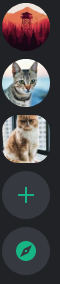
<br>
Кликаем знак + снизу и создаем сервер по шаблону или без

# Создаем Бота

### Идем на портал для разработчкиов
<br>
https://discord.com/developers/applications

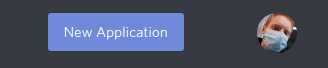!
<br>
### Выбираем создать новое приложение в правом верхнем углу

### Даем имя нашему боту. Не важно какое, но главное, чтобы оно было уникальным
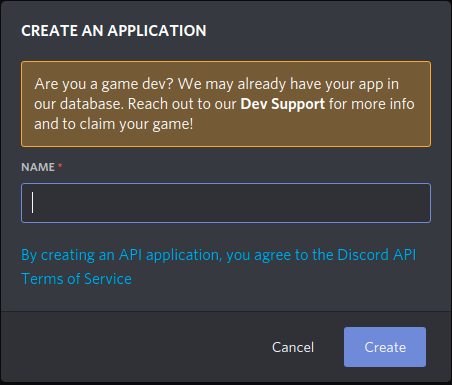

### Идем на вкладку Bot слева в меню и нажимаем кнопку "Add bot", которая будет справа
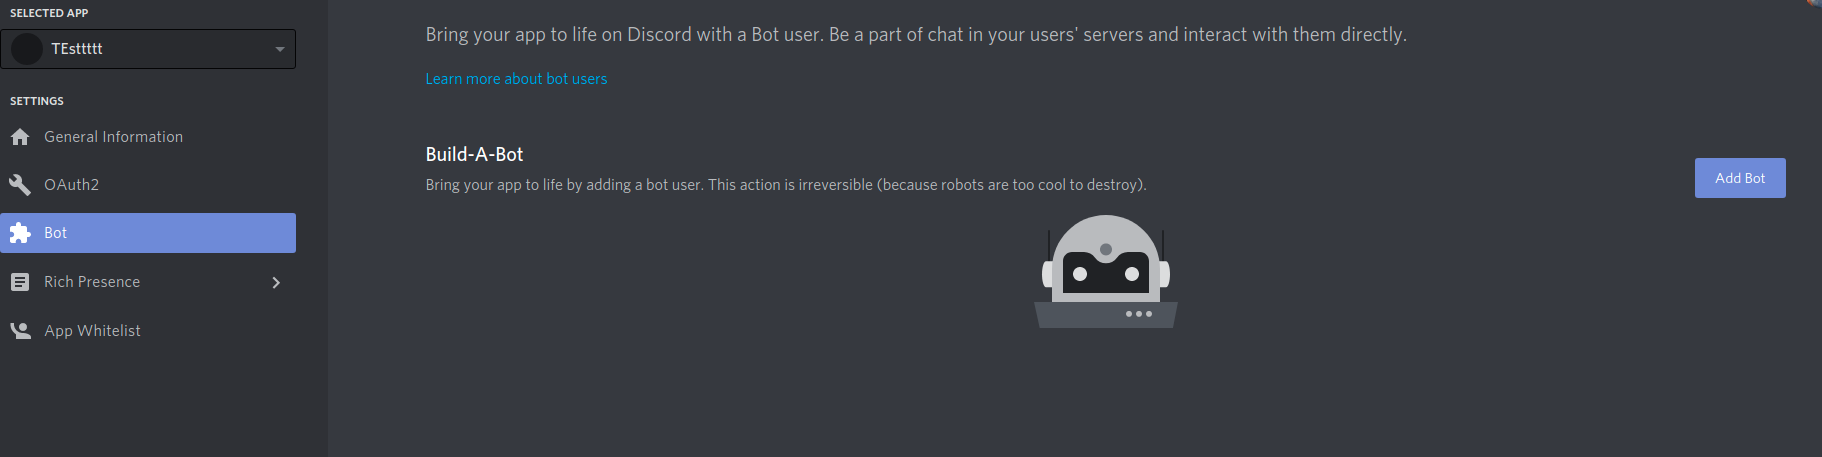

### Дальше выбираем слево в меню OAuth2 и ставим галочку там где bot.
### Внизу в поле появиться ссылка
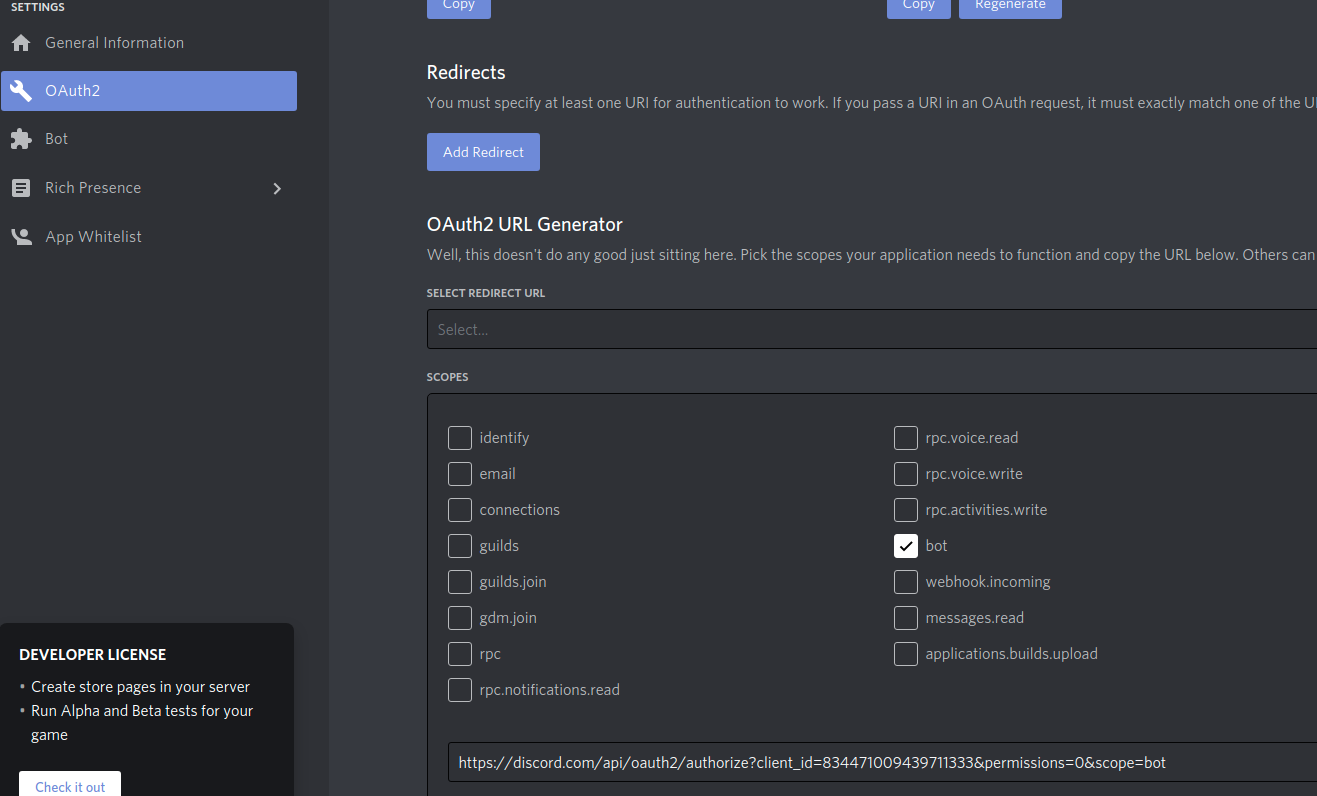

### Копируем эту ссылку в браузер. 

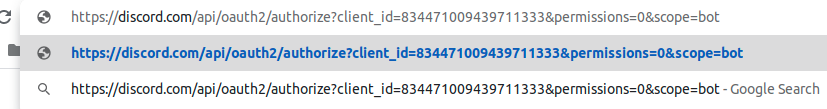

### Выбираем наш сервер, который создали ранее и добавляем его туда

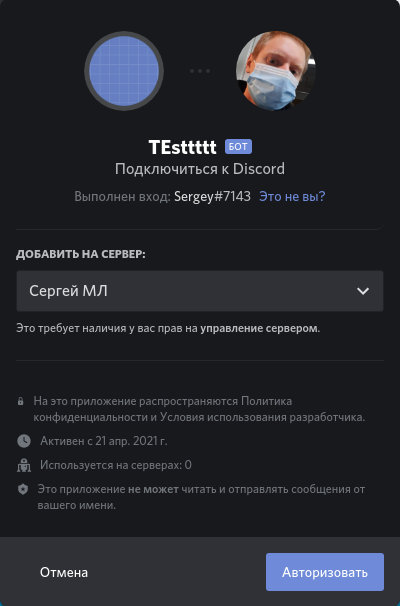

### Бот должен появиться на сервере 

# Hello discrod

### Для работы с ботом нам потребуется API TOKEN
### ВАЖНО! Токен дает полный контроль над ботом, не показывайте его никому и не давайте. В целях обучения вы увидете мой токен, но помните, что вам так делать не следует

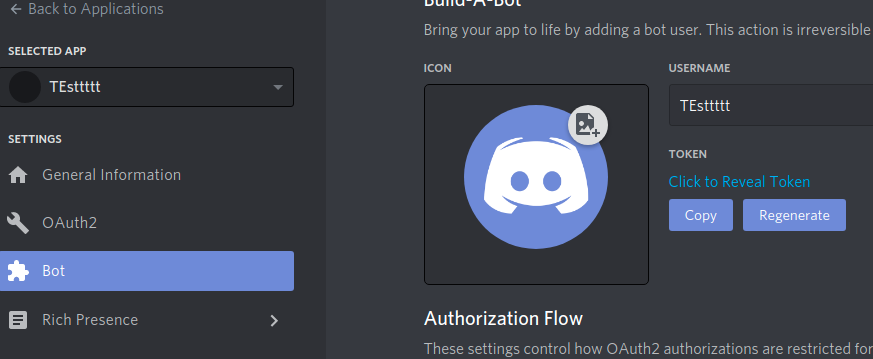
### Скопируем наш токен нажав на copy в меню bot

### Переходи на replit где будем писать нашего бота

https://replit.com/

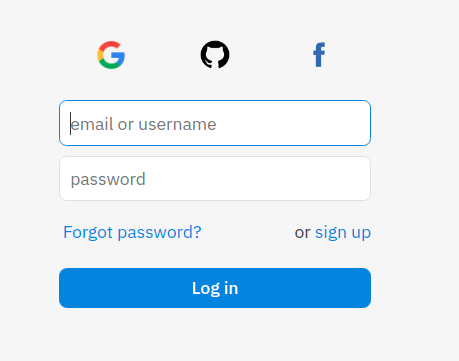

### Чтобы залогиниться используйте гугл аккаунт или почту

In [ ]:
import discord

TOKEN = 'Ваш токен'
SERVER_NAME = 'Имя вашего сервера'

client = discord.Client()

# @client.event - это декоратор. 
# Декораторами в питоне незывают функции, 
# который принимают функцию как аргумент и возвращают функцию
@client.event
async def on_ready():
    for guild in client.guilds:
        print('Hello '+guild)

# Команда должна быть всегда в самом низу нашего скрипта
client.run(TOKEN)

приставка async говорит, что фукнция должна выполняться асинхронно, а не последовательно

Добавим функцию для того, чтобы наш бот отвечал нам в чате

In [ ]:
@client.event
async def on_message(message):
    # В случае, если автором сообщения является бот
    # то мы не отвечаем. Иначе бот будет разговаривать сам с собой
    if message.author == client.user:
        return
    await message.channel.send('Привет человек') 

### Практическое задание. Придумать простой разговорник

In [ ]:
# Продолжаем работать в функции on_message определенной ранее
@client.event
async def on_message(message):
    # В случае, если автором сообщения является бот
    # то мы не отвечаем. Иначе бот будет разговаривать сам с собой
    if message.author == client.user:
        return
    if message.content.lower() == 'Привет':
        await message.channel.send('И тебе привет человек') 

### Учим бота реагировать на картинки

Чтобы получить информации о вложении из файла исользуется атрибут attachments
<br>
Он возвращает список всех вложений из отправленного сообщения

In [ ]:
@client.event
async def on_message(message):
  # В случае, если автором сообщения является бот
    # то мы не отвечаем. Иначе бот будет разговаривать сам с собой
    if message.author == client.user:
        return
    if message.content.lower() == 'Привет':
        await message.channel.send('И тебе привет человек') 
    # Смотрим, что внутри отправленного вложения. Если ничего нет то будет пустой список
    print(message.attachments)

Если мы шлем картинку, то в списке один елемент, имеющий атрибуты url, filename и т.д

### Добавляем взаимодействие с API

http://104.236.235.5:3000
<br>
http://104.236.235.5:3000/predict

In [ ]:
# Добавляем сверху импорт модуля requests
import requests

# Задаем нашу функцию
def request_api_data(url, filename):
    pass 


Добавлям параметры. Данные для POST запроса и url API

In [ ]:
def request_api_data(url, filename):
    data = {"url": url, "filename": filename}
    url = "http://104.236.235.5:3000/predict"

Делаем запрос и смотри что он возвращает

In [ ]:
def request_api_data(url, filename):
    data = {"url": url, "filename": filename}
    url = "http://104.236.235.5:3000/predict"
    response = requests.post(url, data)
    print(response, response.json())

Завершаем создание функции

In [ ]:
def request_api_data(url, filename):
    data = {"url": url, "filename": filename}
    url = "http://104.236.235.5:3000/predict"
    response = requests.post(url, data)
    if response.status_code == 200:
        label = response.json()['class_name']
        return label
    return 'Произошла ошибка при запросе данных'

Добавляем запрос в логикуу ответа на сообщения

In [ ]:
IMG_EXTENTIONS = ['jpg', 'png', 'jpeg']

async def on_message(message):

    if message.author == client.user:
        return
    
    if len(message.attachments) == 1:
        attachment = message.attachments[0]
        ext = attachment.filename.split('.')[-1]
        if ext in IMG_EXTENTIONS:
            data = request_api_data(attachment.url, attachment.filename)
            await message.channel.send(data)

Вот что должно получиться

In [ ]:
import discord
import requests


TOKEN = 'Имя Вашего токена'
SERVER_NAME = 'Имя вашего сервера'
IMG_EXTENTIONS = ['jpg', 'png', 'jpeg']

client = discord.Client()


def request_api_data(url, filename):
    data = {"url": url, "filename": filename}
    url = "http://104.236.235.5:3000/predict"
    response = requests.post(url, data)
    if response.status_code == 200:
        label = response.json()['class_name']
        return label
    return 'Произошла ошибка при запросе данных'


@client.event
async def on_ready():
    for guild in client.guilds:
        print(guild)


@client.event
async def on_message(message):

    if message.author == client.user:
        return

    if len(message.attachments) == 1:
        attachment = message.attachments[0]
        ext = attachment.filename.split('.')[-1]
        if ext in IMG_EXTENTIONS:
            data = request_api_data(attachment.url, attachment.filename)
            await message.channel.send(data)

### Дополнительное задание крестики нолики

Добавляем Правила

In [ ]:
RULES = {'камень': 'бумага',
         'ножницы': 'камень',
         'бумага': 'ножницы'}

Прописываем логику игры

In [ ]:
import random

if message.content.lower() in RULES.keys():
    computer = random.choice(list(RULES.keys()))

    await message.channel.send(computer)

    if message.content.lower() == computer:
        await message.channel.send('Ничья')    
    elif message.content.lower() == RULES[computer]:
        await message.channel.send('Ты победил')    
    else:
        await message.channel.send('Ты проиграл')

Вот что должно получиться в итоге

In [ ]:
import random
import discord
import requests


TOKEN = 'Имя Вашего токена'
SERVER_NAME = 'Имя вашего сервера'
IMG_EXTENTIONS = ['jpg', 'png', 'jpeg']
RULES = {'камень': 'бумага',
         'ножницы': 'камень',
         'бумага': 'ножницы'}

client = discord.Client()


def request_api_data(url, filename):
    data = {"url": url, "filename": filename}
    url = "http://104.236.235.5:3000/predict"
    response = requests.post(url, data)
    if response.status_code == 200:
        label = response.json()['class_name']
        return label
    return 'Произошла ошибка при запросе данных'


@client.event
async def on_ready():
    for guild in client.guilds:
        print(guild)


@client.event
async def on_message(message):

    if message.author == client.user:
        return

    if len(message.attachments) == 1:
        attachment = message.attachments[0]
        ext = attachment.filename.split('.')[-1]
        if ext in IMG_EXTENTIONS:
            data = request_api_data(attachment.url, attachment.filename)
            await message.channel.send(data)

    if message.content.lower() in RULES.keys():
        computer = random.choice(list(RULES.keys()))

        await message.channel.send(computer)

        if message.content.lower() == computer:
            await message.channel.send('Ничья')    
        elif message.content.lower() == RULES[computer]:
            await message.channel.send('Ты победил')    
        else:
            await message.channel.send('Ты проиграл')   

client.run(TOKEN)


Поиграем в кахут
http://kahoot.it/